# Assignment 2

Perform the following operations using Python on the Air Quality and Heart Diesases data sets
1. Data Cleaning
2. Data Integration
3. Data Transformation
4. Error Correcting
5. Data Model Building

### Import python libraries

In [2]:
import pandas as pd
import numpy as np

### Reading the AirQuality Dataset

In [3]:
file= pd.read_csv(r"C:\Users\pranv\OneDrive\Desktop\dsbda\datasets\airquality.csv")
file

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,Low
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,Medium


## Data Cleaning

### Fill the NaN values with mean of respective column

In [4]:
file['Ozone'].fillna(file['Ozone'].mean(), inplace=True)
file['Solar.R'].fillna(file['Solar.R'].mean(), inplace=True)
file['Wind'].fillna(file['Wind'].mean(), inplace=True)
file["Humidity"].fillna("Medium", inplace=True)
file

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.00000,190.000000,7.4,67,5,1,High
1,2,36.00000,118.000000,8.0,72,5,2,High
2,3,12.00000,149.000000,12.6,74,5,3,Low
3,4,18.00000,313.000000,11.5,62,5,4,Medium
4,5,42.12931,185.931507,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.00000,193.000000,6.9,70,9,26,Low
149,150,42.12931,145.000000,13.2,77,9,27,Low
150,151,14.00000,191.000000,14.3,75,9,28,High
151,152,18.00000,131.000000,8.0,76,9,29,Medium


## Error Correcting

### Look for Missing Values

In [5]:
file.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
Humidity      0
dtype: int64

## Data Transformation

### Using Label Encoding for Encoding column values

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [7]:
file["Humidity"]= le.fit_transform(file["Humidity"])
file

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.00000,190.000000,7.4,67,5,1,0
1,2,36.00000,118.000000,8.0,72,5,2,0
2,3,12.00000,149.000000,12.6,74,5,3,1
3,4,18.00000,313.000000,11.5,62,5,4,2
4,5,42.12931,185.931507,14.3,56,5,5,0
...,...,...,...,...,...,...,...,...
148,149,30.00000,193.000000,6.9,70,9,26,1
149,150,42.12931,145.000000,13.2,77,9,27,1
150,151,14.00000,191.000000,14.3,75,9,28,0
151,152,18.00000,131.000000,8.0,76,9,29,2


## Data Model Building

### Splitting x and y data

In [8]:
x= file[["Day"]]
y= file[["Temp"]]

### Splitting the Training and Testing Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)

### Importing Linear Regression for prediction

In [10]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
predict = model.predict(x_test)

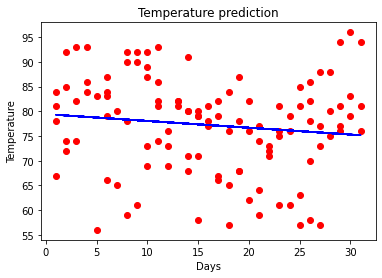

In [13]:
import matplotlib.pyplot as plt
plt.title("Temperature prediction")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, model.predict(x_train), color="blue")

### Checking the Accuracy with MSE & RMSE

In [14]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(predict, y_test)
mse

75.5178466436934

In [15]:
rmse= np.sqrt(mse)
rmse

8.690100496754534